# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
- What type of machine learning is linear regression?
- What is a “line of best fit” using the OLS method?
- What is the difference between correlation and regression?
- Describe a scenario when you would use linear regression and why you would use it. 


- In your own words, briefly describe a simple linear regression model.
A linear regression model fits a line to a group of data in a way that minimizes the error between the observed data and the line.  We can then use the slope of the created line to make estimates about how much the input variable contributes to the output.  Simple in this case means 1 column of independent variables

- What type of machine learning is linear regression?
This is classified as either statistical machine learning, or supervised machine learning

- What is a “line of best fit” using the OLS method?
It's an equation or a line that fits within the data in such a way that the differences between the predictions and the observations is minimized.  The linear coefficient shows "how much" the independent variable effects the dependent variable.

- What is the difference between correlation and regression?
Correlation indicates how much variation in one variable is mirrored in another variable.  High correlation shows that 2 data sets are closely mirroring each others movement.  Regression makes predictions based previous data. Regression shows how much the input variable impacts the output variable.  For instance if a 1 million ton increase in corn harvests lead to a $2 dollar decrease in the futures price of corn, our Regression would have a -2 coefficient.  Correlation shows connection, and regression shows a causal link with an equation.    

- Describe a scenario when you would use linear regression and why you would use it. 
Considering the corn futures prices scenario, if I were to plot pair plots or .correlation tables and notice that some variables had greater than .5 or .6 correlation with the futures price, I'd consider them for regression.  The next step would be to plot those candidates pairwise with the futures price of corn.  Those graphs where I can "hand sketch" a reasonable approximation line would then probably be things I'd run a regression on.  So for instance if I discovered a correlation between yield, diesel prices, tractor prices and corn futures prices I'd run a regression on that to look at how much everythhing contributes to the overall picture.  


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
A simple linear relationship between the input and output, for instance an increase in x by 2 would increase y by 2* some coefficient.  
- Normality
X and Y variables have a standard normal distribution.  
- Homoscedasticity
Error values tend to stay constant, they don't increase or decrease with x, if this is violated you'd see a kind of "funnel" of error values, or a bulge somewhere 
- No multicollinearity
Two independent variables are not dependent on each other.  For instance project 3 had us study age, and years in industry, but years in industry was highly dependent on age, so  they would be bad candidates to both include in the model. 
- No endogeneity
The error terms do not correlate with any explanatory variable.  It's often known as ommitted variable bias.  
- No autocorrelation
Error terms should be independent of each other. Ideally they're normally distributed with no pattern.  

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
It's the y-intercept in 2-d graphing, where your line starts.  
- Coefficient of Independent Variable (B1)
How much the independent variable effects the output.  The slope of your line, for instance in an x=age y = salary regression.  A B1 of 10,000 would indicate the general trend of a year of age commanding $10,000 additional salary.
- Standard Error
The sum of the squares of the error.  How much each measurement is off of the line.  
- T-Statistic
Like a z-score but for small sample sizes or unknown standard deviations, it's a measure of how likely a null hypthesis population would produce the given sample.  
- P-Value of T-Statistic (from the independent variable) 
The probability of a given T-Statistic arising if the null hypothesis were true.  


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
A measure of how much variation in Y is explained by X the indpenedent variable.  High R squared means the outputs values are mostly explained by the input parameters
- Adjusted R-squared
Because using more independent variables in correlation generally leads to better R squareds, adjusts down R squared in order to penalize bad explanatory variables. 


## Step 5: Interpret A Results Table


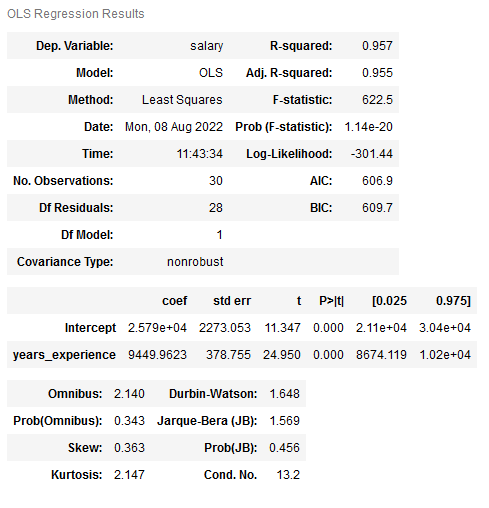



1. In this example, what is the name of the dependent variable and what is the name of the independent variable?
Salary is the dependent variable (Dep. Variable), years_experiencce is the independent variable.  
2. In this example, how much of the variability in the data is explained by the model?
95.7 or 95.5% depending on if you use the adjusted or unadjusted r squared
3. What is the p-value of the t-statistic in this example? Is this result considered to be statistically significant?
0.000.  Yes, anything lower than .05 is usually considered significant.
4. What is the intercept/constant?
intercept = 25,790 (2.579 e^4) 
5. What is the coefficient of the independent variable?
9449.96 

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
# make necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

# from sklearn import linear_model #why one way over another?
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# load data

df_clean=pd.read_csv("master.csv")
df_control=pd.read_csv("house_data.csv")# I'm going to import both sets to have some comparisons for later.  

In [3]:
df_clean.head()

,id,beds,baths,sqft_house,sqft_lot,floors,water,view,house_cond,grad,...,year_reno,zip,lat,long,sqft_house_nbrs,sqft_lot_nbrs,No,Yes,date,price
0,7129300520,3,1.00,1180,5650.0,1.0,No,5,3,7.0,...,0.0,98178.0,47.5112,-122.257,1340,5650,1,0,20141013T000000,221900.0
1,6414100192,3,2.25,2570,7242.0,2.0,No,5,3,7.0,...,1991.0,98125.0,47.7210,-122.319,1690,7639,1,0,20141209T000000,538000.0
2,5631500400,2,1.00,770,10000.0,1.0,No,5,3,6.0,...,0.0,98028.0,47.7379,-122.233,2720,8062,1,0,20150225T000000,180000.0
3,2487200875,4,3.00,1960,5000.0,1.0,No,5,1,7.0,...,0.0,98136.0,47.5208,-122.393,1360,5000,1,0,20141209T000000,604000.0
4,1954400510,3,2.00,1680,8080.0,1.0,No,5,3,8.0,...,0.0,98074.0,47.6168,-122.045,1800,7503,1,0,20150218T000000,510000.0


In [4]:
df_control.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800


In [5]:
#imports successful.  Interesting to have the two data frames next to each other to compare stylistic decisions.  

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [6]:
# explore data below (you will need to make new cells)

In [7]:
df_clean.describe()

,id,beds,baths,sqft_house,sqft_lot,floors,view,house_cond,grad,sqft_house_above,...,year_built,year_reno,zip,lat,long,sqft_house_nbrs,sqft_lot_nbrs,No,Yes,price
count,2.161500e+04,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,...,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,2.161500e+04
mean,4.580604e+09,3.370946,2.116262,2063.535970,7465.570715,1.494356,4.765718,2.590747,7.656859,1788.965139,...,1971.003701,84.302198,98077.950867,47.560039,-122.213864,1986.637937,7423.345038,0.992459,0.007541,5.400460e+05
std,2.876605e+09,0.902731,0.768583,869.530253,3514.056262,0.539986,0.766285,0.650634,1.175455,831.381626,...,29.370619,401.451800,53.499461,0.138551,0.140857,685.417152,3307.250118,0.086513,0.086513,3.670787e+05
min,1.000102e+06,1.000000,0.750000,370.000000,520.000000,1.000000,1.000000,1.000000,1.000000,290.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,3.209000e+03
25%,2.123049e+09,3.000000,1.750000,1430.000000,5040.000000,1.000000,5.000000,2.000000,7.000000,1190.000000,...,1951.000000,0.000000,98033.000000,47.471050,-122.328000,1490.000000,5100.000000,1.000000,0.000000,3.219750e+05
50%,3.904931e+09,3.000000,2.250000,1910.000000,7614.000000,1.500000,5.000000,3.000000,7.000000,1560.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,1.000000,0.000000,4.500000e+05
75%,7.309000e+09,4.000000,2.500000,2540.000000,9072.000000,2.000000,5.000000,3.000000,8.000000,2210.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,8970.000000,1.000000,0.000000,6.450000e+05
max,9.900000e+09,10.000000,8.000000,5990.000000,19998.000000,3.500000,5.000000,5.000000,13.000000,12542.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,19998.000000,1.000000,1.000000,7.700000e+06


In [8]:
# sns.pairplot(df_clean)
#unusable  I'm going to pair plot against 

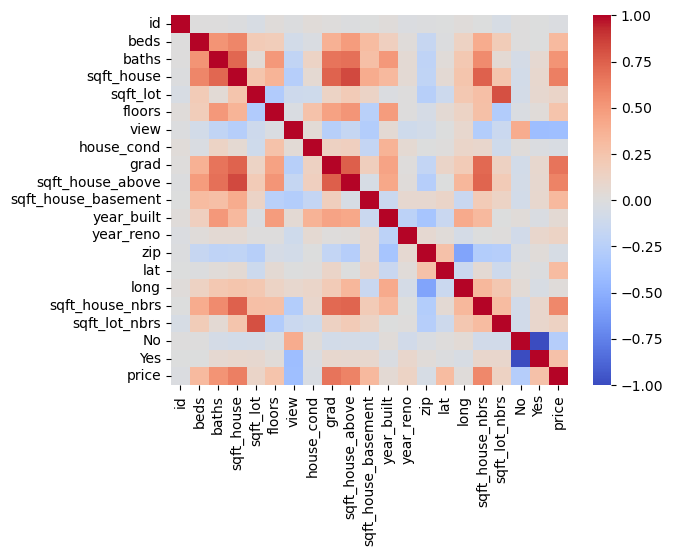

In [9]:
sns.heatmap(df_clean.corr(),cmap='coolwarm',annot=False)
df_numeric=df_clean.drop(columns=['No','Yes','year_reno'],inplace=False)


In [10]:
heatDist=df_numeric.corr()
heatDist
# sns.heatmap(heatDist,cmap='coolwarm',annot=True)

,id,beds,baths,sqft_house,sqft_lot,floors,view,house_cond,grad,sqft_house_above,sqft_house_basement,year_built,zip,lat,long,sqft_house_nbrs,sqft_lot_nbrs,price
id,1.000000,0.002999,0.005551,-0.009680,-0.046437,0.018622,-0.011559,0.023686,0.008129,-0.011232,-0.005220,0.021663,-0.008350,-0.001906,0.021037,-0.002759,-0.050774,-0.016921
beds,0.002999,1.000000,0.527584,0.592352,0.202493,0.183538,-0.082703,-0.024073,0.367225,0.491357,0.309602,0.161939,-0.158597,-0.011302,0.136116,0.405488,0.189466,0.316402
baths,0.005551,0.527584,1.000000,0.724288,0.045168,0.502287,-0.188222,0.126517,0.664307,0.683840,0.283266,0.506892,-0.204449,0.024137,0.225176,0.569494,0.050150,0.525383
sqft_house,-0.009680,0.592352,0.724288,1.000000,0.242872,0.354829,-0.262019,0.057999,0.740324,0.829243,0.400837,0.325696,-0.201927,0.049455,0.245192,0.749869,0.247115,0.619023
sqft_lot,-0.046437,0.202493,0.045168,0.242872,1.000000,-0.290886,-0.116217,-0.106807,0.126419,0.198886,0.123025,-0.020398,-0.253179,-0.119547,0.222600,0.281346,0.806017,0.112176
floors,0.018622,0.183538,0.502287,0.354829,-0.290886,1.000000,-0.029416,0.263912,0.458096,0.522385,-0.245747,0.489161,-0.059083,0.049648,0.125577,0.279967,-0.282848,0.256698
view,-0.011559,-0.082703,-0.188222,-0.262019,-0.116217,-0.029416,1.000000,0.046078,-0.251313,-0.166766,-0.276958,0.053427,-0.084768,-0.006186,0.078449,-0.280376,-0.138024,-0.397056
house_cond,0.023686,-0.024073,0.126517,0.057999,-0.106807,0.263912,0.046078,1.000000,0.144679,0.157978,-0.174060,0.361195,-0.002563,0.014983,0.106491,0.092837,-0.108804,-0.036474
grad,0.008129,0.367225,0.664307,0.740324,0.126419,0.458096,-0.251313,0.144679,1.000000,0.752608,0.168356,0.446830,-0.184668,0.114016,0.198481,0.713119,0.146987,0.667157
sqft_house_above,-0.011232,0.491357,0.683840,0.829243,0.198886,0.522385,-0.166766,0.157978,0.752608,1.000000,-0.052189,0.423148,-0.260173,-0.001046,0.342881,0.729695,0.202716,0.602832


<AxesSubplot:>

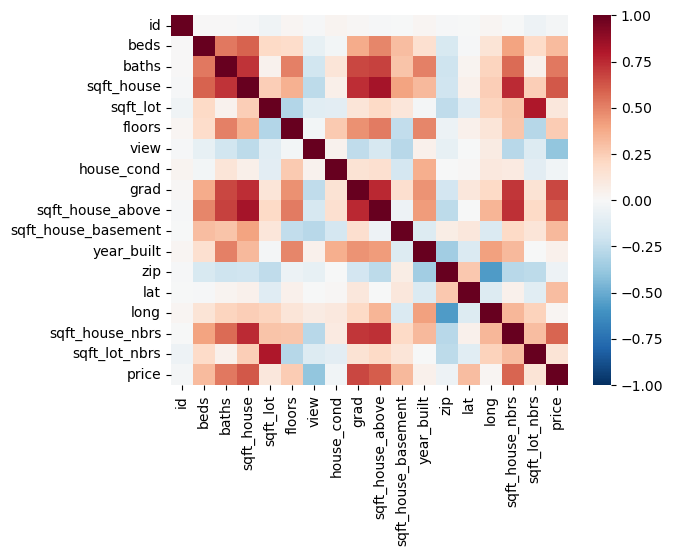

In [11]:
sns.heatmap(heatDist,cmap='RdBu_r', vmax=1, vmin=-1,annot=False)


In [12]:
df_clean=df_clean[['beds','baths','sqft_house','floors','grad','sqft_house_above','year_built','sqft_house_nbrs','price']]

I think it's important to clarify a "derived" variable from a fixed variable, for instance if you pay more you can't realistically get more square footage, but you can get better a price if your house is bigger.  So i'm interested in derived fixed variables inputs to derived variables.  

I've got some good candidates for exploration regarding sale price.  baths, sqft_house, grade, sqft_house above, and sqft_nbrs. 

I've also got some other interesting relationships, grade and how it relates to determiners like beds, baths and sqft_house. 

Lastly I'd kind of like to look at sqft_house_nbrs and how well it relates to the size of a house that's built.  

<AxesSubplot:>

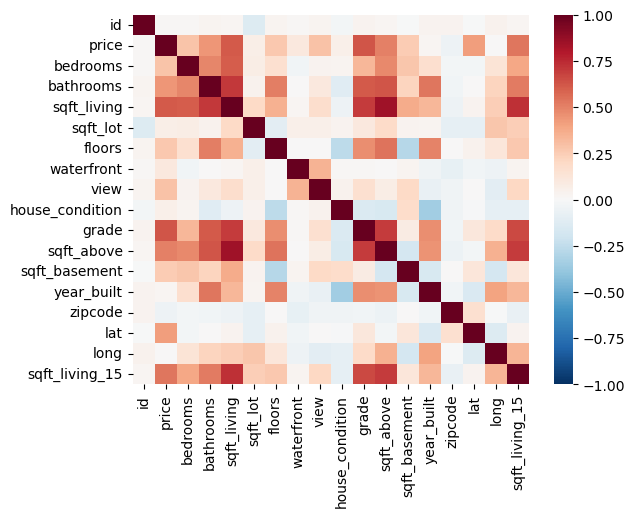

In [13]:
#for comparison purposes I want to see the heatmap of the supplied dataset 
sns.heatmap(df_control.corr(),cmap='RdBu_r', vmax=1, vmin=-1,annot=False)

after a little bit of exploration I'm going to strip down my data frames to the interesting variables.  I'll be dropping most of the variables.  I'll be keeping, price, bedrooms, bathrooms,, sqft_living, floors, house_condition, grade, sqft_bove, yert_built, sqft_house_nbrs

In [14]:
#sns.pairplot(df_clean)

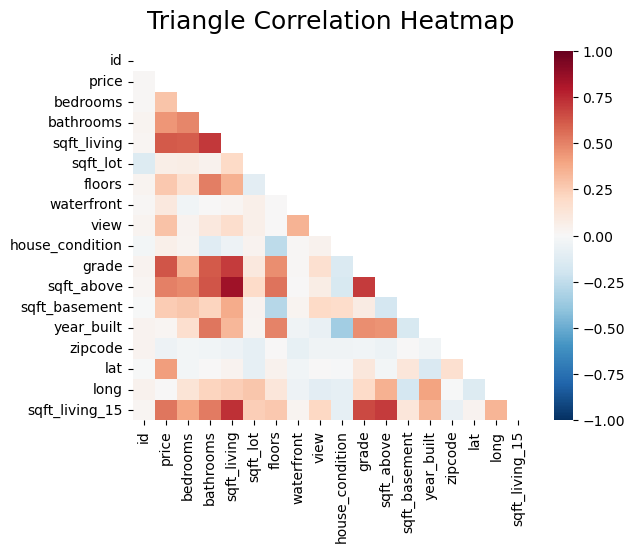

In [15]:
mask = np.triu(np.ones_like(df_control.corr(), dtype=bool))
heatmap = sns.heatmap(df_control.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='RdBu_r')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

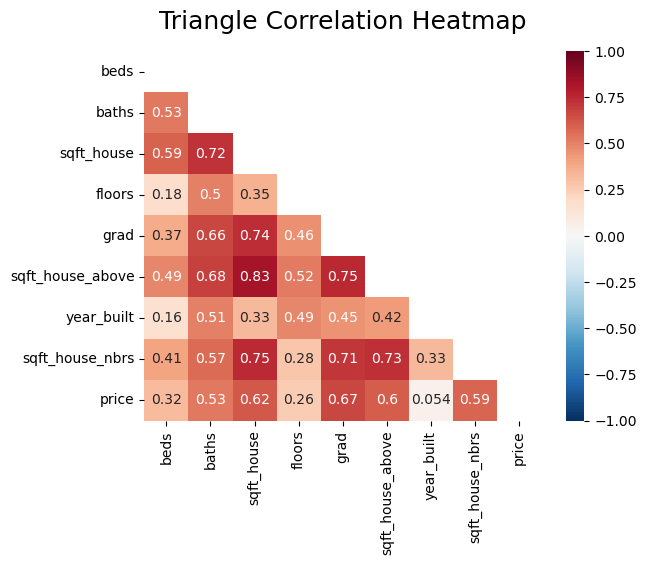

In [16]:
mask = np.triu(np.ones_like(df_clean.corr(), dtype=bool))
heatmap = sns.heatmap(df_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu_r')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [17]:
spearmanr(df_clean['sqft_house'],df_clean['baths'])

SpearmanrResult(correlation=0.73970594764308, pvalue=0.0)

I like the idea of evaluating number of bathrooms in a house vs sqft of the house.  
I think I'm also going to consider price vs grade.  

### Step 3: Determine independent and dependent variable

In [18]:
# set X 
x1=df_clean.sqft_house


# set Y 
y1=df_clean.baths


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_house', ylabel='baths'>

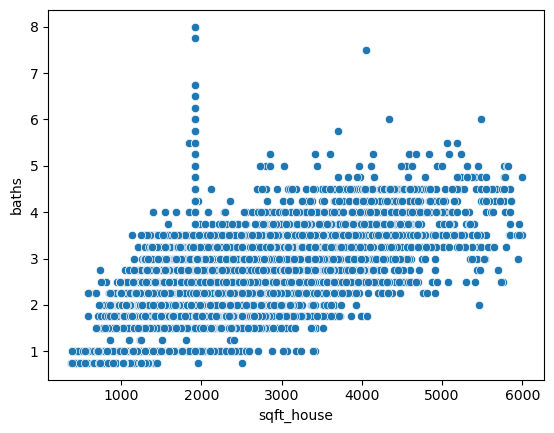

In [19]:
# visualize relationship between X and Y
sns.scatterplot(x1,y1)

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [20]:
# fit model to X and Y variables (you will need to make more cells)

In [21]:
#reshape to a 2-d matrix from a 1-d list
x1_matrix=x1.values.reshape(-1,1)
y1_matrix=y1.values.reshape(-1,1)

In [22]:
#reshape to a 2-d matrix from a 1-d list running a second regression on grade vs price  
# x2_matrix=x2.values.reshape(-1,1)
# y2_matrix=y2.values.reshape(-1,1)

In [23]:
reg1=LinearRegression()
reg2=LinearRegression()

In [24]:
x_1=sm.add_constant(x1)
results=sm.OLS(y1,x_1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  baths   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 2.385e+04
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:03:07   Log-Likelihood:                -16944.
No. Observations:               21615   AIC:                         3.389e+04
Df Residuals:                   21613   BIC:                         3.391e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7952      0.009     85.661      0.000       0.777       0.813
sqft_house     0.0006   4.15e-06    154.431      0.000       0.001       0.001
==============================================================================
Omnibus:                     5436.828   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37533.231
Skew:                           1.032   Prob(JB):                         0.00
Kurtosis:                       9.117   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Bathrooms')

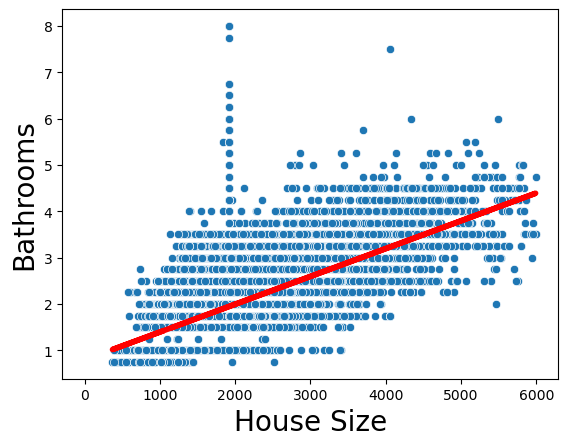

In [25]:
sns.scatterplot(x1,y1)
yhat = .0006*x_1+.7952
fig= plt.plot(x_1,yhat, lw=4, c='red', label='regression line')
plt.xlabel('House Size', fontsize = 20)
plt.ylabel('Bathrooms', fontsize=20)

### Step 5: Interpret Model Summary 

In [26]:
# print out and interpret model summary // terms identified below
x_1=sm.add_constant(x1)
results=sm.OLS(y1,x_1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  baths   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 2.385e+04
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:03:07   Log-Likelihood:                -16944.
No. Observations:               21615   AIC:                         3.389e+04
Df Residuals:                   21613   BIC:                         3.391e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7952      0.009     85.661      0.000       0.777       0.813
sqft_house     0.0006   4.15e-06    154.431      0.000       0.001       0.001
==============================================================================
Omnibus:                     5436.828   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37533.231
Skew:                           1.032   Prob(JB):                         0.00
Kurtosis:                       9.117   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpret the following from your model:

- R-squared 
The percentage of variation that is explained by the model.  In this case about 52.5%
- Coefficient of independent variable
.0006 It means roughly thatthere is a new bathroom added for every 1500 sq ft or so of house.  
- P-value of T-statistic
The probability these results occurred by chance, i.e. the odds the null hypothesis is true.  

- P-value of F-statistic
0.000 in this case.  This means that this hypothesis it's extremely unlikely we would have observed this R squared if the null hypothesis were true.  

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [27]:
# predict new y values (dependent variables) by feeding model new independent variable values
inputs=[1000, 1100, 1600,2000,3500]
output = [{x, .0006*x+.7952} for x in inputs ]
output



[{1.3952, 1000},
 {1.4552, 1100},
 {1.7551999999999999, 1600},
 {1.9952, 2000},
 {2.8951999999999996, 3500}]

So an 1100 sq foot house would have about 1 1/2 baths
1600 would have 1 3/4
2000 would have about 2
3500 would have almost 3.  

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [28]:
# Pick another independent variable. Be sure to avoid multicollinearity. 

I'm going to look at floors and bedrooms

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [29]:
# fit new regression model (you will need to make more cells)

In [30]:
#Choose X
x1=df_clean[['sqft_house','beds']]
y=df_clean['baths']

In [31]:
x=sm.add_constant(x1)

In [32]:
results=sm.OLS(y,x).fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  baths   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                 1.266e+04
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:03:07   Log-Likelihood:                -16599.
No. Observations:               21615   AIC:                         3.320e+04
Df Residuals:                   21612   BIC:                         3.323e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5235      0.014     38.120      0.000       0.497       0.550
sqft_house     0.0006   5.06e-06    110.727      0.000       0.001       0.001
beds           0.1293      0.005     26.501      0.000       0.120       0.139
==============================================================================
Omnibus:                     4513.939   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24888.246
Skew:                           0.896   Prob(JB):                         0.00
Kurtosis:                       7.942   Cond. No.                     8.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared 
.540 This is a bit of a better explainer of variation in bedroom sizes than just house size.  
- Adjusted R-squared
Identical to R-squared at .540 so the bedroom variable added a little to the model
- Coefficient of independent variables
.0006 for sqft, and .1293 for the beds   So increasing a house by 500 sqft and adding a bedroom would add 1/2 bathroom to a house on average.   
- P-value of T-statistic
0.000 It means the null hypothesis is unlikely and there is some relationship between the variables
- P-value of F-statistic
0.00 The R squared is unlikely to have arisen from a null-hypothesis environment.  



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [38]:
# predict new y values (dependent variables) by feeding model new independent variable values
x_sqft=1000
x_bed=8
yhat= .5235+.0006 *x_sqft+.1293*x_bed
yhat

2.1578999999999997

In [39]:
1/.0006

1666.6666666666667

around 1 1/2 baths.  

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [35]:
# create new markdown cell and write down your observations

One of the big things I've noticed is the predictions are a little low, I think this is because of how I dealt with low outliers in the data cleaning.  Dropping might have been better, or setting the minimum to 1.  One of the other differences which is interesting is the adjusting of the y-intercept constant.  

# Part 4 - Multivariate Time Series Analysis

In [36]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 